# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaccine <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')


Rows: 66113 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
df_vacc_rates = vaccine |>
    filter(mmr >= 0) |> 
    group_by(state) |>
    summarize(vacc_rate = (sum(mmr >= 95, na.rm = TRUE) / n()))
              
df_vacc_rates


state,vacc_rate
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

# Arkansas

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

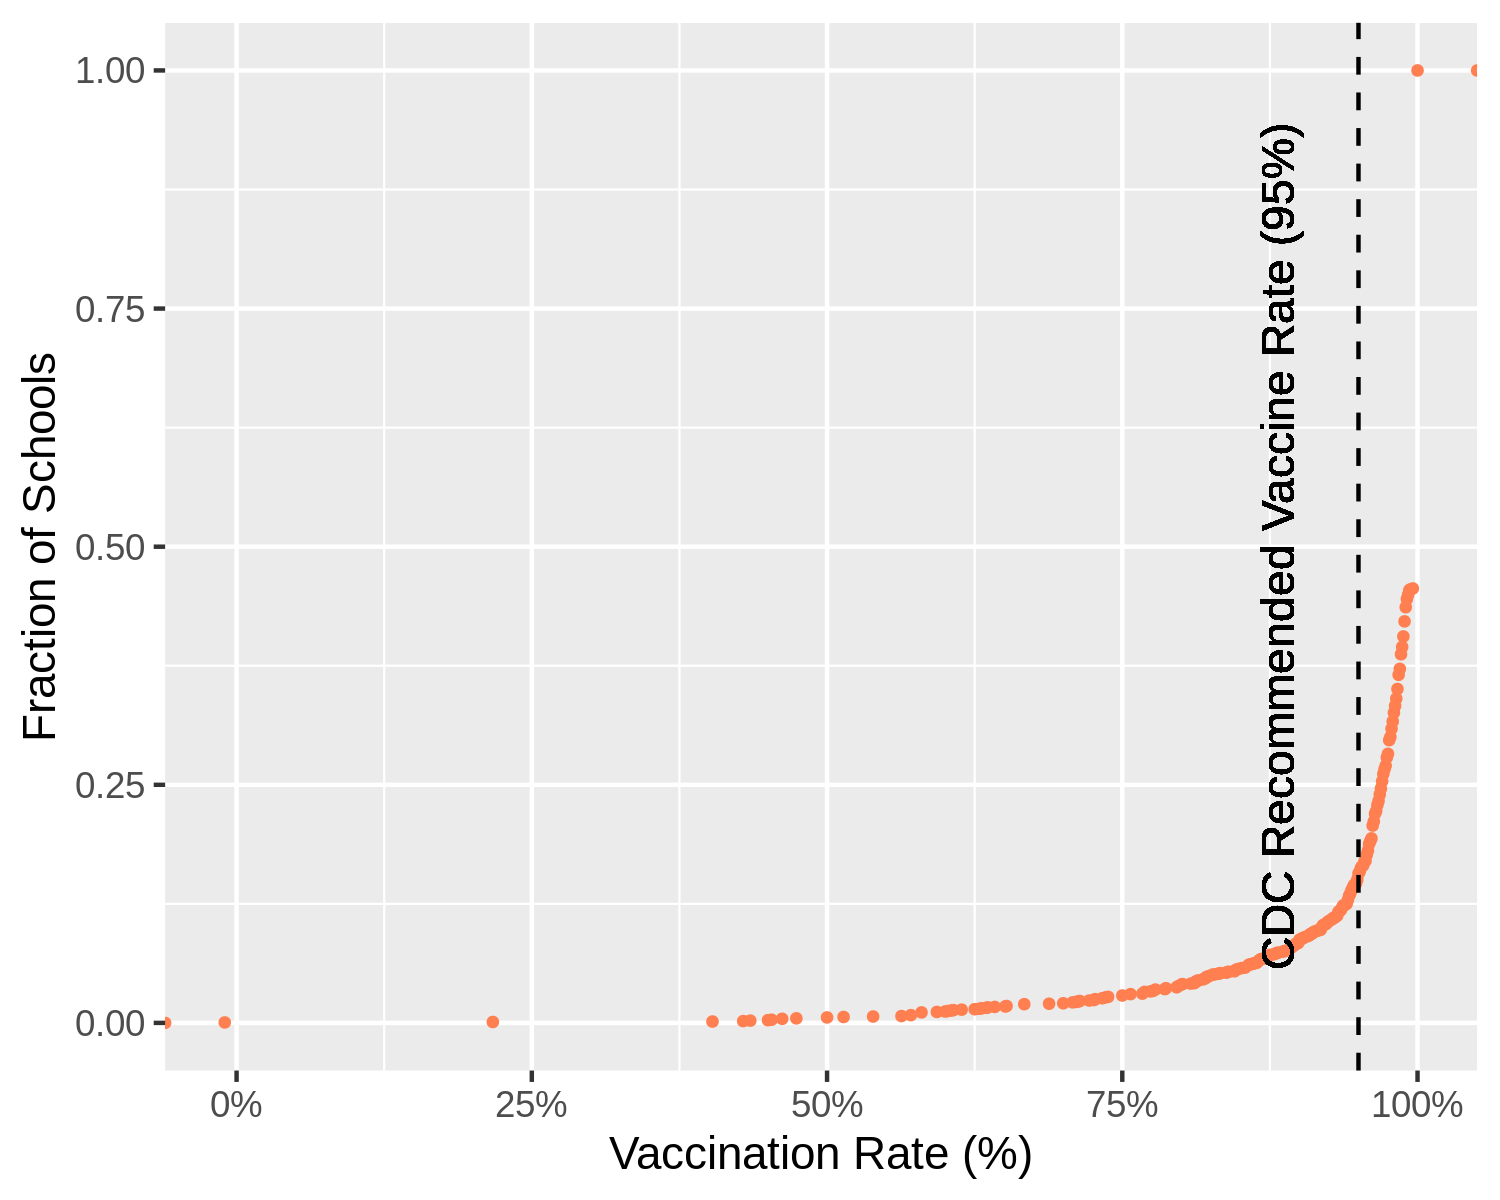

In [53]:
df_vacc_rates2 = vaccine |>
    filter(state == 'North Carolina') |> 
    arrange(overall) |> 
    mutate(rk = row_number() / n())

vline <- 95

p = ggplot(df_vacc_rates2, aes(overall)) + stat_ecdf(geom = "point", color = "coral" , size = 0.75) +
    xlab("Vaccination Rate (%)") + ylab("Fraction of Schools") +
    scale_x_continuous(labels = function(x) paste0(x, "%")) +                   
    geom_vline(xintercept = 95, linetype = 2) +
    geom_text(aes(vline, .5 , label = "CDC Recommended Vaccine Rate (95%)", vjust = -2, angle = 90))               
    
    
             
p
                     
                       

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

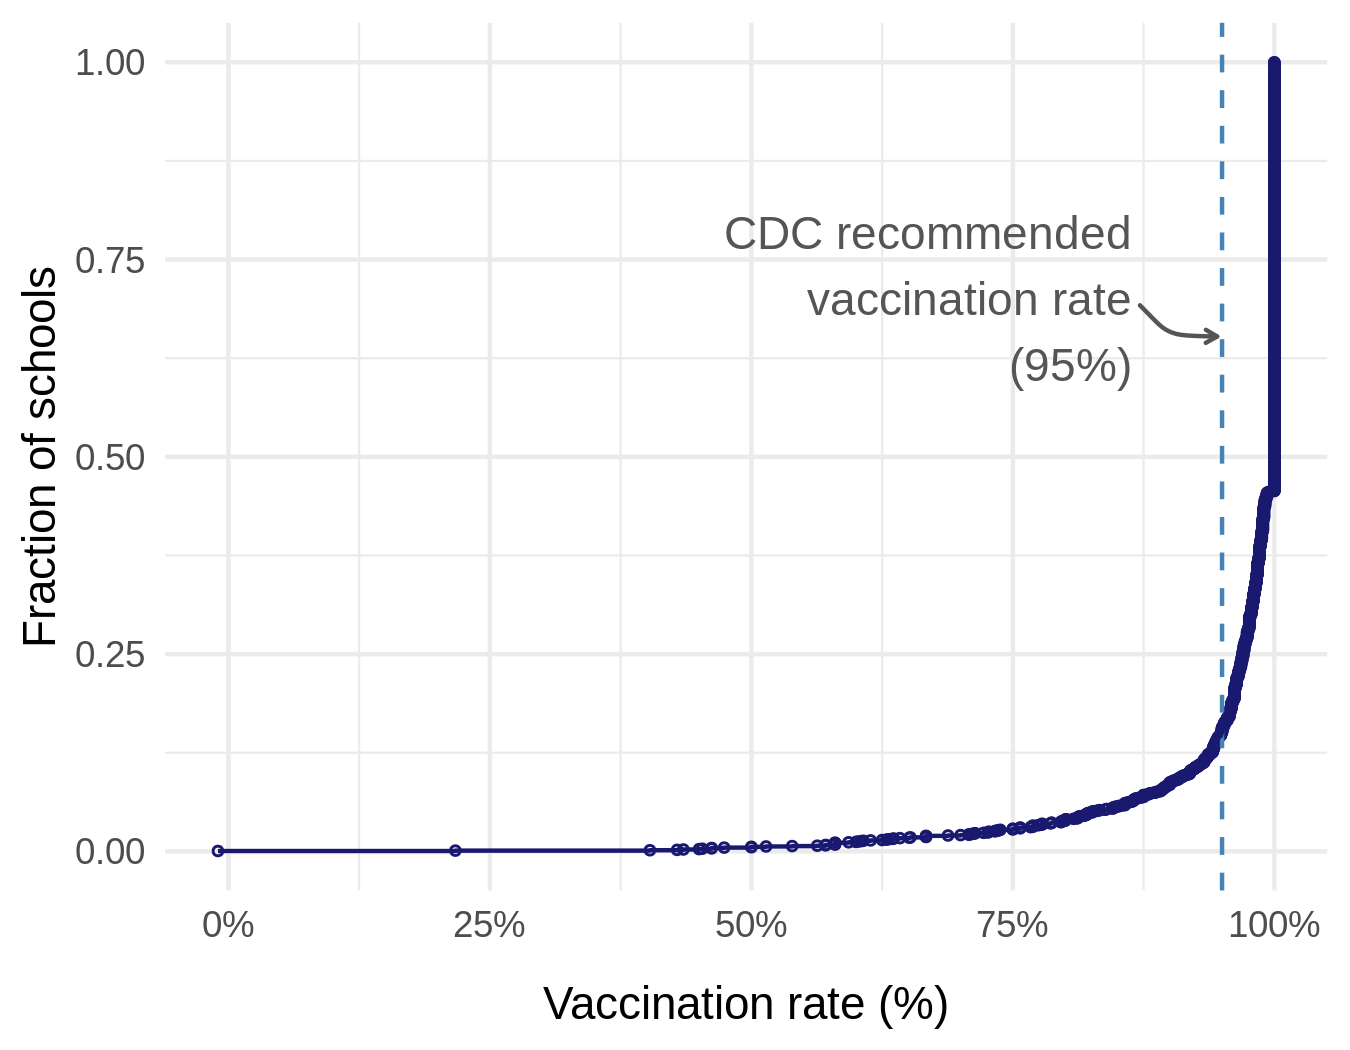![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

# No 